In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
model=LinearRegression()

In [41]:
df=pd.read_csv('homeprices.csv')
df.head(10)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# USING PANDAS 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    13 non-null     object
 1   area    13 non-null     int64 
 2   price   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 444.0+ bytes


In [5]:
dummy = pd.get_dummies(df.town,  dtype = int)

In [6]:
merge= pd.concat([df, dummy] , axis='columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [7]:
final=merge.drop(['town','west windsor'] , axis='columns')

In [4]:
model=LinearRegression()

In [9]:
X=final.drop('price' , axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [10]:
Y=final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [11]:
model.fit(X,Y)

LinearRegression()

In [12]:
model.predict(pd.DataFrame([[2800, 0, 1]], columns=['area','monroe township','robinsville']))

array([590775.63964739])

In [13]:
model.predict(pd.DataFrame([[3400, 1, 0]], columns=['area','monroe township','robinsville']))

array([641227.69296925])

In [14]:
model.score(X,Y)

0.9573929037221871

# USING SKLEARN 

In [41]:
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
dfle=df
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [43]:
X=df[['town' ,'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [44]:
Y=dfle.price.values
Y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [46]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [47]:
X=X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [48]:
model.fit(X,Y)

LinearRegression()

In [49]:
model.predict([[1,0,2800]])

array([590775.63964739])

# EXERCISE 1

In [29]:
df1=pd.read_csv('carprices.csv')
df1

,CarModel,Mileage,Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


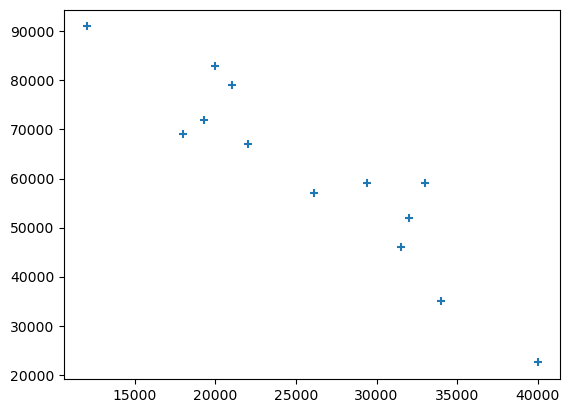

In [17]:
plt.scatter(df1.Price ,df1.Mileage ,marker='+')
plt.show()

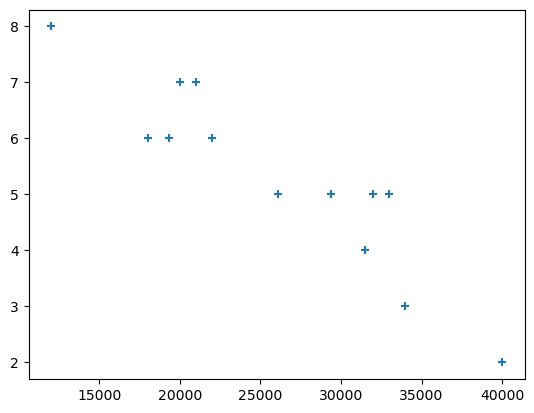

In [18]:
plt.scatter(df1.Price ,df1.Age ,marker='+')
plt.show()

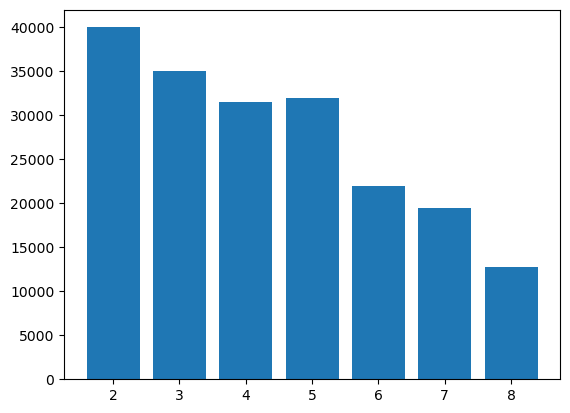

In [5]:
plt.bar (df1.Age , df1.Price )
plt.show()

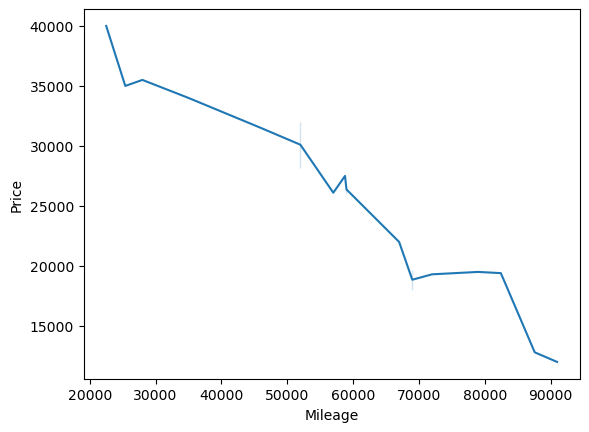

In [7]:
import seaborn as sns
sns.lineplot(data=df1, x="Mileage", y="Price")
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
dfle=df1

In [32]:
dfle.CarModel=le.fit_transform(dfle.CarModel)
dfle

,CarModel,Mileage,Price,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [33]:
X=dfle[['CarModel','Mileage','Age']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [34]:
Y=dfle.Price.values
Y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('CarModel',OneHotEncoder(),[0])] , remainder='passthrough')

In [38]:
X=ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [39]:
X=X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [41]:
model.fit(X,Y)

LinearRegression()

In [50]:
model.predict([[0,1,45000,4]]) #price of Mercedes

array([36991.31721063])

In [44]:
model.predict([[1,0,86000,]]) #price of BMW

array([11080.74313217])

In [51]:
model.score(X,Y)

0.9417050937281083

# TRAIN_TEST_SPLIT METHOD

In [9]:
df=pd.read_csv('carprices1.csv')
df

,Mileage,Age,Price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [12]:
X=df[['Mileage','Age']]
Y=df[["Price"]]

In [13]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.4)

In [22]:
X_train

,Mileage,Age
7,72000,6
14,82450,7
5,59000,5
9,67000,6
0,69000,6
6,52000,5
13,58780,4
2,57000,5
3,22500,2
17,69000,5


In [23]:
Y_train

,Price
7,19300
14,19400
5,26750
9,22000
0,18000
6,32000
13,27500
2,26100
3,40000
17,19700


In [24]:
slt=model.fit(X_train, Y_train)

In [25]:
model.predict(X_test)

array([[17396.16733037],
       [12380.74772851],
       [15679.09319185],
       [38609.84852799],
       [35740.77159929],
       [39861.74953175],
       [31154.62053206],
       [25709.93239557]])

In [26]:
Y_test

,Price
11,19500
8,12000
10,18700
16,35500
1,34000
15,35000
4,31500
12,26000


In [27]:
model.score(X_test , Y_test)

0.9094533744131337

# EXERCISE 2  USING LOGISTIC REGRESSION 

In [86]:
df = pd.read_csv('HR.csv')
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7041,0.59,0.82,4,203,4,1,0,0,sales,low
8755,0.95,0.51,3,224,4,0,0,0,support,medium
4011,0.80,0.79,3,217,3,0,0,0,technical,low
12594,0.10,0.77,6,255,4,0,1,0,management,low
4007,0.74,0.71,4,133,2,0,0,0,technical,medium
10135,1.00,0.56,5,247,3,0,0,0,technical,low
5500,0.76,0.76,4,149,3,0,0,0,technical,medium
9797,0.69,0.77,3,232,2,0,0,0,sales,low
3694,0.93,0.62,3,231,6,0,0,0,hr,medium
3392,0.81,0.70,4,219,2,1,0,0,hr,medium


In [87]:
left=df[df.left==1]
left.shape

(3571, 10)

In [88]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [89]:
numeric_cols = df.select_dtypes(include=['number']).columns
df.groupby('left')[numeric_cols].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


<Axes: xlabel='salary', ylabel='count'>

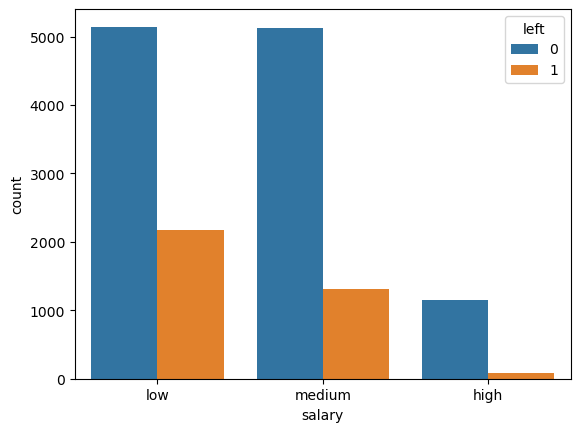

In [90]:
sns.countplot(df , x='salary' , hue='left')

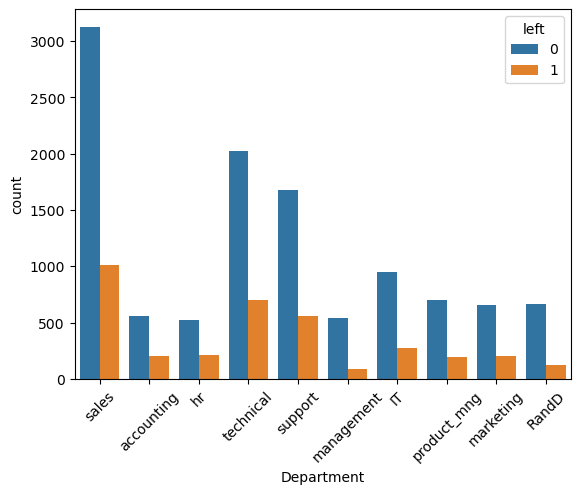

In [91]:
sns.countplot(df , x='Department' , hue='left')
plt.xticks(rotation=45)
plt.show()

In [177]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_0,salary_1,salary_2
0,0.38,157,0,1,False,True,False
1,0.80,262,0,2,False,False,True
2,0.11,272,0,2,False,False,True
3,0.72,223,0,1,False,True,False
4,0.37,159,0,1,False,True,False


In [178]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_0,salary_1,salary_2
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [179]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_0,salary_1,salary_2
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [183]:
from sklearn.model_selection import train_test_split


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
model.fit(X_train, y_train)

LogisticRegression()

In [188]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
model.score(X_test,y_test)

0.7718095238095238

# Exercise 3

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

Sepal Length \
Sepal Width\
Petal Length\
Petal Width\
Using above 4 features you will clasify a flower in one of the three categories,

Setosa \
Versicolour\
Virginica

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data , iris.target , test_size=0.2)

In [27]:
y_train

array([2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1,
       2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1,
       2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 2, 0, 2, 2, 1, 2, 2])

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train , y_train)

LinearRegression()

In [28]:
y_test[0:5]

array([0, 0, 0, 0, 2])

In [14]:
model.score(X_test , y_test)

0.9205926294829363

In [15]:
iris.target[45]

0

In [32]:
y_pred=model.predict([iris.data[45]]).astype(int)
y_pred

array([0])

In [29]:
model.predict(iris.data[0:5]).astype(int)

array([0, 0, 0, 0, 0])

In [30]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# DECISION TREE

In [64]:
df=pd.read_csv('salaries.csv')
df.sample(10)

,company,job,degree,salary_more_then_100k
8,abc pharma,business manager,bachelors,0
0,google,sales executive,bachelors,0
9,abc pharma,business manager,masters,1
2,google,business manager,bachelors,1
12,facebook,business manager,bachelors,1
11,facebook,sales executive,masters,1
15,facebook,computer programmer,masters,1
13,facebook,business manager,masters,1
5,google,computer programmer,masters,1
3,google,business manager,masters,1


In [65]:
Input=df.drop('salary_more_then_100k' , axis='columns')
target=df['salary_more_then_100k']

In [44]:
Input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [45]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

In [68]:
Input['company_n']=le1.fit_transform(Input['company'])
Input['job_n']=le2.fit_transform(Input['job'])
Input['degree_n']=le3.fit_transform(Input['degree'])

In [69]:
input_n=Input.drop(['company','job','degree'] , axis='columns')

In [70]:
input_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [71]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
input_int=input_n.astype(int)
target_int=target.astype(int)

In [89]:
X_train, X_test , Y_train ,Y_test=train_test_split(input_int , target_int , test_size=0.2)

In [80]:
X_train

,company_n,job_n,degree_n
9,0,0,1
5,2,1,1
0,2,2,0
3,2,0,1
14,1,1,0
4,2,1,0
10,1,2,0
15,1,1,1
12,1,0,0
11,1,2,1


In [83]:
model1=LinearRegression()


In [84]:
model1.fit(X_train , Y_train)

LinearRegression()

In [85]:
model1.score(X_test , Y_test)

-1.7885175458532196

In [88]:
pred=model1.predict(X_test)
op=pred.astype(int)
op

array([0, 0, 1, 0])

In [87]:
Y_test

1     0
7     0
13    1
6     0
Name: salary_more_then_100k, dtype: int32

In [73]:
model.fit(input_int , target)

DecisionTreeClassifier()

In [74]:

model.score(input_int , target_int)

1.0

In [75]:

model1.predict([[2,2,0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.4123506])

# EXERCISE 4 ON DECISION TREES

In [123]:
import math

In [124]:
df=pd.read_csv('titanic.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.00,1,1,16966,134.5000,E34,C
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.00,0,0,349203,7.8958,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.00,0,0,345774,9.5000,NaN,S
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.00,0,1,24160,211.3375,B3,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.00,0,0,695,5.0000,B51 B53 B55,S
811,812,0,3,"Lester, Mr. James",male,39.00,0,0,A/4 48871,24.1500,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [126]:
df['Age'] = df['Age'].fillna(0).astype(int)

In [127]:
df['Fare']=df['Fare'].astype(int)

In [128]:
mean=math.floor(df.Age.mean())
mean

23

In [129]:
df['Age']=df['Age'].replace(0 , mean)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28,0,0,2697,7,NaN,C
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16,0,0,367231,7,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14,1,0,2651,11,NaN,C
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,23,0,0,343095,8,NaN,S
358,359,1,3,"McGovern, Miss. Mary",female,23,0,0,330931,7,NaN,Q
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41,0,5,3101295,39,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,23,0,0,SOTON/O.Q. 3101305,7,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41,0,0,16966,134,E40,C
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,23,0,0,374746,8,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26,C103,S


In [130]:
Input=df.drop(	['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked' ], axis='columns')
target = df['Survived']

In [131]:
Input

,Pclass,Sex,Age,Fare
0,3,male,22,7
1,1,female,38,71
2,3,female,26,7
3,1,female,35,53
4,3,male,35,8
...,...,...,...,...
886,2,male,27,13
887,1,female,19,30
888,3,female,23,23
889,1,male,26,30


In [132]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Input['sex_n'] = le.fit_transform(Input['Sex'])

In [133]:
Input.sample(10)

,Pclass,Sex,Age,Fare,sex_n
764,3,male,16,7,1
27,1,male,19,263,1
159,3,male,23,69,1
654,3,female,18,6,0
767,3,female,30,7,0
312,2,female,26,26,0
500,3,male,17,8,1
676,3,male,24,8,1
803,3,male,23,8,1
541,3,female,9,31,0


In [134]:
Input_n=Input.drop('Sex' ,axis='columns')
Input_n

,Pclass,Age,Fare,sex_n
0,3,22,7,1
1,1,38,71,0
2,3,26,7,0
3,1,35,53,0
4,3,35,8,1
...,...,...,...,...
886,2,27,13,1
887,1,19,30,0
888,3,23,23,0
889,1,26,30,1


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input_n,target,test_size=0.2)

In [136]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [137]:
model.score(X_train, y_train)

0.9550561797752809

In [138]:
y_test

265    0
333    0
539    1
610    0
887    1
      ..
458    1
459    0
567    0
507    1
8      1
Name: Survived, Length: 179, dtype: int64

In [139]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [140]:
model.predict([[1,38,71, 0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

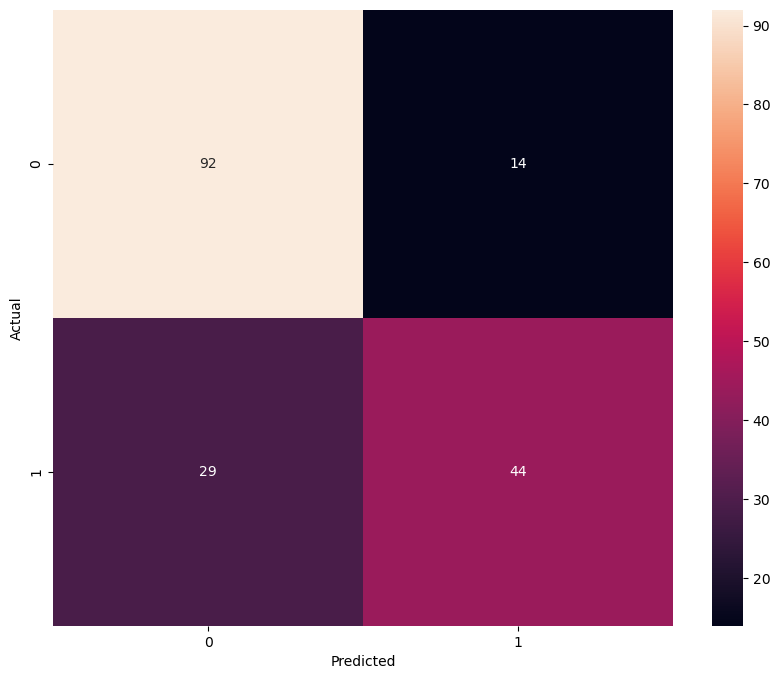

In [141]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM (SUPPORT VECTOR MACHINE)

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits=load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

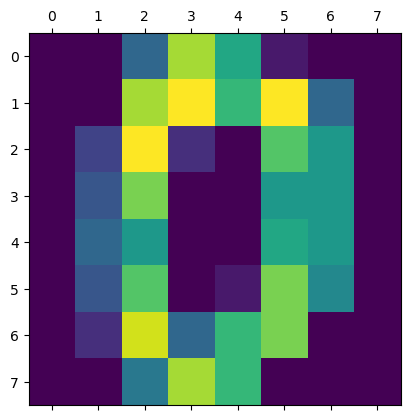

In [147]:
plt.matshow(digits.images[0]) 

In [148]:
len(digits.feature_names)

64

In [149]:
df=pd.DataFrame(digits.data , columns=digits.feature_names)

In [150]:
df['target']=digits.target

In [151]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [152]:
X=df.drop('target',axis='columns')

In [153]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [154]:
y=df['target']

In [155]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [156]:
X_train , X_test, y_train , y_test = train_test_split(X ,y , test_size=0.2)

In [157]:
X_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1062,0.0,0.0,6.0,11.0,16.0,16.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,5.0,16.0,13.0,0.0,0.0,0.0
1752,0.0,0.0,4.0,10.0,12.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,10.0,0.0,0.0,0.0
1781,0.0,0.0,10.0,16.0,14.0,5.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,1.0,11.0,16.0,15.0,6.0,0.0,0.0
1693,0.0,0.0,1.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,1.0,10.0,15.0,14.0,4.0,0.0
1083,0.0,0.0,0.0,14.0,14.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,12.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,0.0,0.0,8.0,15.0,16.0,11.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,10.0,16.0,12.0,1.0,0.0,0.0
1299,0.0,0.0,6.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,8.0,3.0,0.0,0.0,4.0,16.0,16.0,15.0,16.0,16.0
1295,0.0,0.0,4.0,15.0,13.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,5.0,15.0,16.0,5.0,0.0,0.0
179,0.0,0.0,0.0,10.0,15.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1.0,8.0,13.0,8.0,0.0,0.0


In [113]:
y_train

1542    8
750     6
56      1
1515    4
1097    1
       ..
1022    4
1335    0
355     1
1119    9
1315    8
Name: target, Length: 1437, dtype: int32

In [14]:
from sklearn.svm  import SVC

In [115]:
model=SVC()

In [116]:
model.fit(X_train , y_train)

SVC()

In [117]:
model.score(X_test , y_test)

0.9861111111111112

In [118]:
y_pred=model.predict(X_test)

In [119]:
y_test

1221    4
486     4
1712    3
1488    9
1064    5
       ..
240     7
1590    1
1138    4
1242    1
1747    1
Name: target, Length: 360, dtype: int32

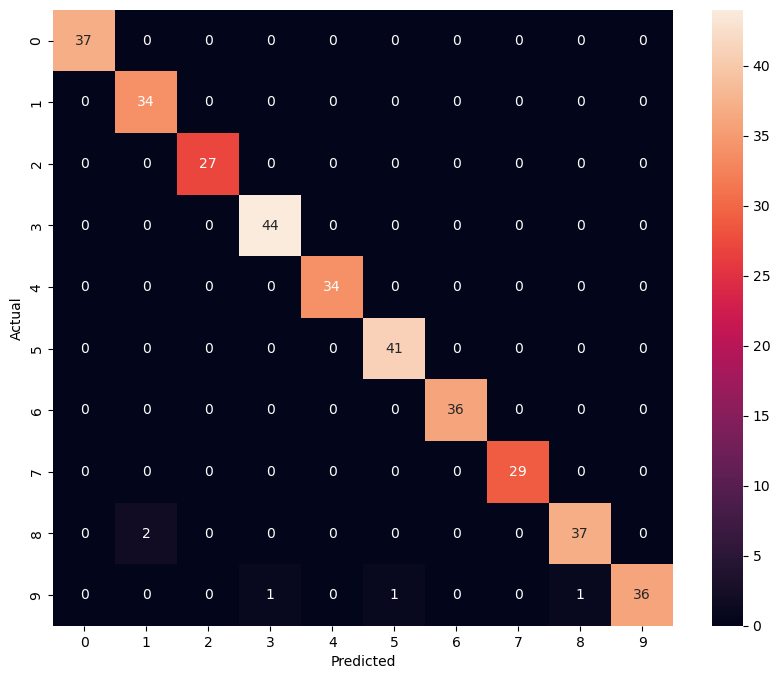

In [120]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# using random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
model.fit(X_train , y_train)

In [ ]:
model.score(X_test , y_test)

In [161]:
y_pred=model.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 5, 3, 5, 3, 2, 1, 2, 2, 0, 0, 5, 2, 8, 9, 8, 2,
       2, 5, 6, 8, 6, 1, 9, 0, 4, 5, 1, 1, 9, 2, 7, 5, 1, 3, 7, 2, 3, 2,
       3, 7, 9, 4, 2, 7, 4, 7, 8, 4, 7, 2, 0, 0, 0, 1, 6, 6, 6, 0, 2, 8,
       2, 1, 4, 9, 5, 4, 1, 1, 9, 1, 4, 7, 8, 1, 9, 7, 6, 5, 3, 5, 0, 5,
       2, 8, 8, 1, 2, 6, 6, 1, 5, 3, 9, 5, 9, 9, 5, 2, 3, 1, 4, 1, 8, 5,
       3, 4, 8, 3, 1, 8, 9, 6, 8, 4, 6, 6, 2, 3, 4, 4, 1, 6, 6, 0, 6, 8,
       0, 9, 6, 3, 6, 6, 6, 5, 7, 5, 1, 5, 4, 6, 5, 5, 2, 9, 4, 8, 6, 6,
       7, 8, 9, 2, 4, 7, 0, 8, 9, 1, 0, 0, 4, 9, 5, 3, 4, 2, 6, 6, 2, 6,
       1, 8, 7, 9, 7, 1, 4, 9, 3, 3, 9, 8, 4, 7, 3, 7, 4, 6, 7, 6, 2, 6,
       0, 2, 2, 1, 3, 7, 3, 5, 7, 4, 4, 0, 1, 9, 0, 1, 7, 2, 5, 0, 3, 2,
       5, 8, 2, 5, 6, 1, 9, 5, 0, 1, 9, 5, 5, 3, 7, 7, 7, 9, 1, 2, 4, 7,
       4, 4, 5, 0, 9, 3, 1, 1, 3, 4, 8, 8, 6, 6, 5, 3, 1, 6, 0, 0, 8, 5,
       3, 6, 0, 3, 3, 2, 8, 4, 6, 9, 5, 1, 5, 2, 0, 0, 1, 7, 4, 0, 9, 8,
       4, 4, 3, 8, 8, 2, 5, 1, 6, 7, 2, 8, 9, 9, 4,

In [162]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

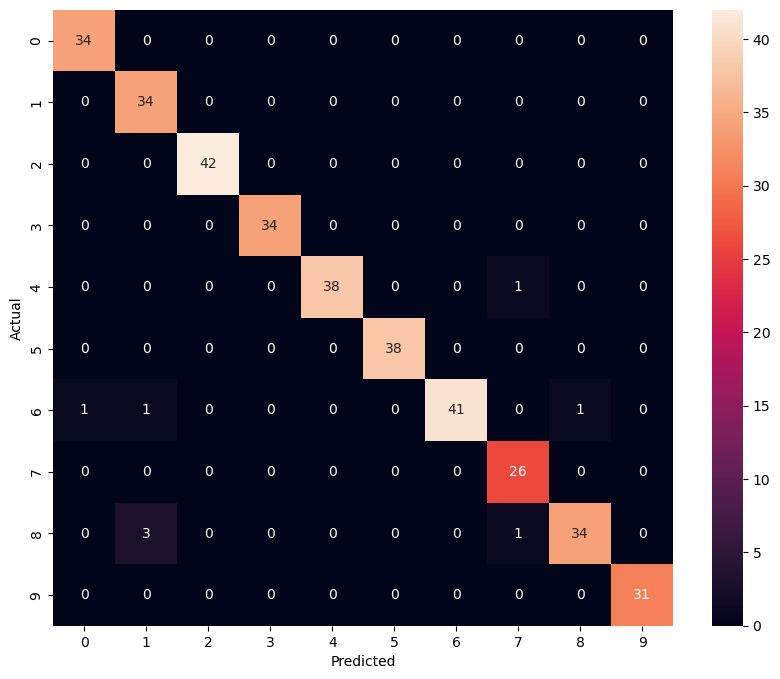

In [163]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KFold Cross Validation

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(LinearRegression() , digits.data , digits.target)

array([0.48346048, 0.5583603 , 0.57534522, 0.5056632 , 0.40995457])

In [21]:
cross_val_score(RandomForestClassifier(n_estimators=150) , digits.data , digits.target)

array([0.93333333, 0.90833333, 0.96100279, 0.96100279, 0.92479109])

In [16]:
cross_val_score(SVC(), digits.data , digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

# K means clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('income.csv')

In [4]:
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


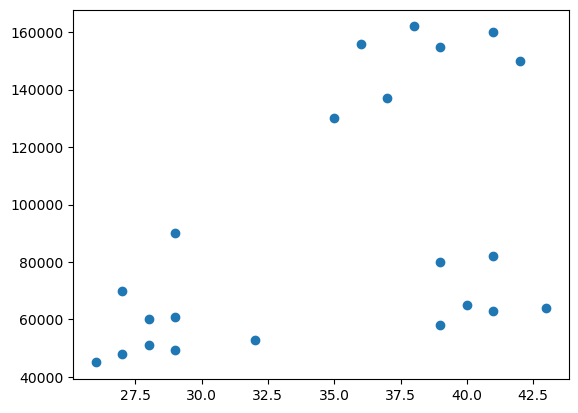

In [5]:
plt.scatter(df.Age , df['Income($)'])
plt.show()

In [6]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age' , 'Income($)']])
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [64]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'cluster'

# Exercise 5on Kmeans Clustering 

In [65]:
from sklearn.datasets import load_iris


In [66]:
irs=load_iris()

In [67]:
dir(irs)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [68]:
irs.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [69]:
irs.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [70]:
df=pd.DataFrame(irs.data, columns=irs.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
df=df.drop(['sepal length (cm)','sepal width (cm)'] , axis='columns')

In [73]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


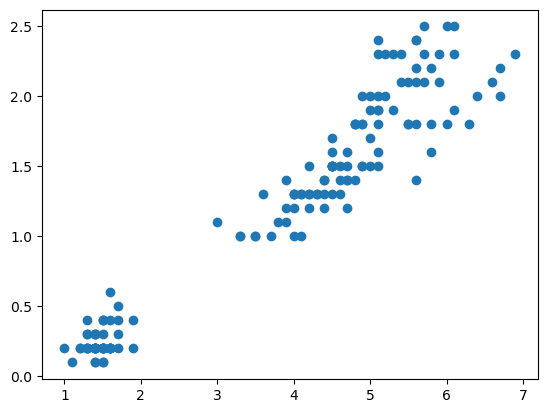

In [74]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.show()

# Elbow method to find no. of clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

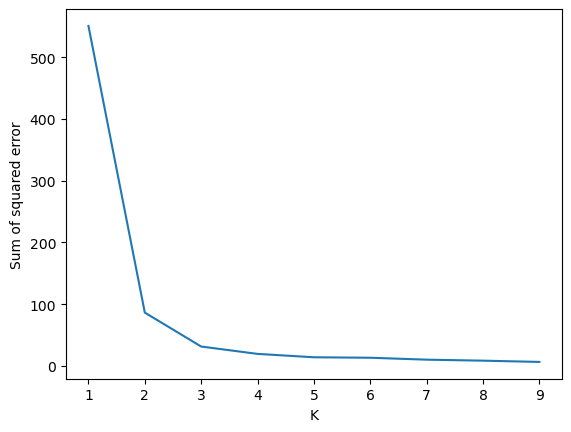

In [75]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [76]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
df['clusters']=y_pred
df

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [39]:
km.cluster_centers_

array([[0.19897959, 0.60459184],
       [0.41810345, 0.28232759],
       [0.70478036, 0.46705426]])

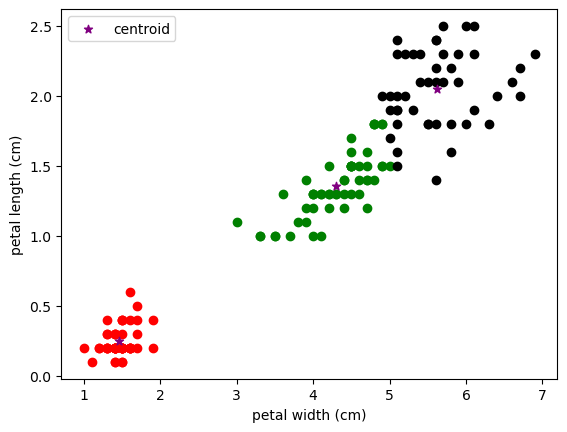

In [79]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
# df4 = df[df.clusters==3]
# df5 = df[df.clusters==4]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
# plt.scatter(df4['sepal length (cm)'],df4['sepal width (cm)'],color='yellow')
# plt.scatter(df5['sepal length (cm)'],df5['sepal width (cm)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.legend()

In [80]:
scaler = MinMaxScaler()

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
df.head()

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [81]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['clusters']=y_pred
df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


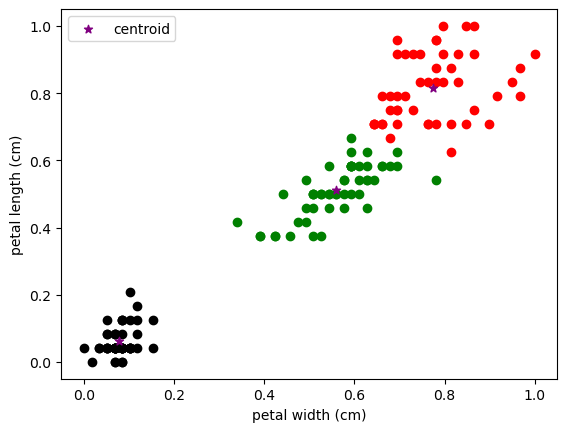

In [82]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
# df4 = df[df.clusters==3]
# df5 = df[df.clusters==4]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
# plt.scatter(df4['sepal length (cm)'],df4['sepal width (cm)'],color='yellow')
# plt.scatter(df5['sepal length (cm)'],df5['sepal width (cm)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.legend()